# DSA AUG ASSESMENT

#### Obesity detection Model 

### STEP 1 : Importing necessary libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\meenu\Downloads\Obesity.csv")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### STEP 2 : Analysing the data

In [4]:
data.shape

(2111, 17)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [13]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [8]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

### STEP 3: Data Preprocessing

##### Handling missing values

Columns with object datatype are imputed with the mode value while numerical column 'height' is handled with mean

In [14]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['family_history_with_overweight'].fillna(data['family_history_with_overweight'].mode()[0], inplace=True)
data['CAEC'].fillna(data['CAEC'].mode()[0], inplace=True)
data['SCC'].fillna(data['SCC'].mode()[0], inplace=True)
data['MTRANS'].fillna(data['MTRANS'].mode()[0], inplace=True)

In [15]:
data['Height'].fillna(data['Height'].mean(), inplace=True)

Rechecking the data for null values:

In [16]:
print(data.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


#### Encoding Categorical variables

One-Hot encoding 

In [51]:
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC','MTRANS']


encoded_data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)  # Use drop_first=True to drop one of the binary columns to prevent multicollinearity

print("Encoded Data:")
print(encoded_data.head())

Encoded Data:
    Age  Height  Weight  FCVC  NCP  CAEC  CH2O  FAF  TUE  CALC  \
0  21.0    1.62    64.0   2.0  3.0     1   2.0  0.0  1.0     0   
1  21.0    1.52    56.0   3.0  3.0     1   3.0  3.0  0.0     1   
2  23.0    1.80    77.0   2.0  3.0     1   2.0  2.0  1.0     2   
3  27.0    1.80    87.0   3.0  3.0     1   2.0  2.0  0.0     2   
4  22.0    1.78    89.8   2.0  1.0     1   2.0  0.0  0.0     1   

            NObeyesdad  Gender_Male  family_history_with_overweight_yes  \
0        Normal_Weight            0                                   1   
1        Normal_Weight            0                                   1   
2        Normal_Weight            1                                   1   
3   Overweight_Level_I            1                                   0   
4  Overweight_Level_II            1                                   0   

   FAVC_yes  SMOKE_yes  SCC_yes  MTRANS_Bike  MTRANS_Motorbike  \
0         0          0        0            0                 0   
1     

In [50]:
encoded_data.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CAEC                                    int64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
CALC                                    int64
MTRANS                                 object
NObeyesdad                             object
Gender_Male                             uint8
family_history_with_overweight_yes      uint8
FAVC_yes                                uint8
SMOKE_yes                               uint8
SCC_yes                                 uint8
dtype: object

Other Categorical variables that are having ordinal values are label encoded using replace function

In [52]:
# Define mapping for label encoding
label_mapping = {
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
}

# Apply label encoding using replace
encoded_data.replace(label_mapping, inplace=True)

# Display the encoded data
print("Encoded Data:")
print(encoded_data.head())  # Display the first few rows

Encoded Data:
    Age  Height  Weight  FCVC  NCP  CAEC  CH2O  FAF  TUE  CALC  \
0  21.0    1.62    64.0   2.0  3.0     1   2.0  0.0  1.0     0   
1  21.0    1.52    56.0   3.0  3.0     1   3.0  3.0  0.0     1   
2  23.0    1.80    77.0   2.0  3.0     1   2.0  2.0  1.0     2   
3  27.0    1.80    87.0   3.0  3.0     1   2.0  2.0  0.0     2   
4  22.0    1.78    89.8   2.0  1.0     1   2.0  0.0  0.0     1   

            NObeyesdad  Gender_Male  family_history_with_overweight_yes  \
0        Normal_Weight            0                                   1   
1        Normal_Weight            0                                   1   
2        Normal_Weight            1                                   1   
3   Overweight_Level_I            1                                   0   
4  Overweight_Level_II            1                                   0   

   FAVC_yes  SMOKE_yes  SCC_yes  MTRANS_Bike  MTRANS_Motorbike  \
0         0          0        0            0                 0   
1     

##### Visualising the correlation of features

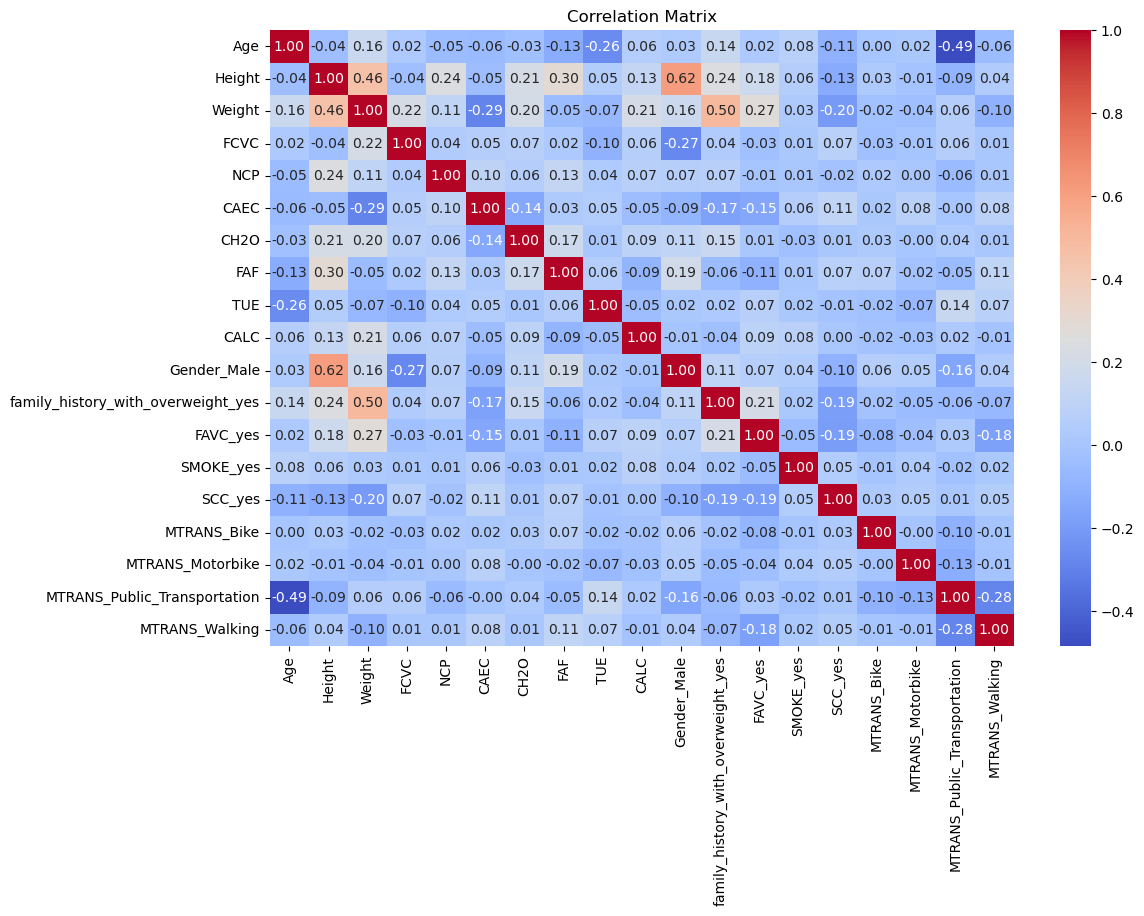

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### STEP 4: Splitting the target and labels

In [54]:
from sklearn.model_selection import train_test_split

X = encoded_data.drop(columns=['NObeyesdad'])  
y = encoded_data['NObeyesdad'] 

X = np.array(X)
y = np.array(y)
print(X.shape,y.shape)


(2111, 19) (2111,)


In [55]:
y=y.reshape(-1,1)

In [56]:
y.shape

(2111, 1)

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Display the shapes of the resulting sets
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (1688, 19) (1688, 1)
Testing set shape (X, y): (423, 19) (423, 1)


### STEP 5 : Traing different classification Models

##### Model 1: K-Nearest Neighbours 

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Initialize the model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train.ravel())

# Predicting
y_pred_knn = knn.predict(X_test)

# Evaluating accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.8841607565011821


###### Model 2: SVM Classifier

In [73]:
from sklearn.svm import SVC
svm = SVC()


svm.fit(X_train, y_train.ravel())
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.5650118203309693


###### Model 3: Decisin Tree And Random Forest Classsifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

dt.fit(X_train, y_train.ravel())
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

rf.fit(X_train, y_train.ravel())
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Decision Tree Accuracy: 0.9385342789598109
Random Forest Accuracy: 0.9456264775413712


###### Model 4: Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, y_train.ravel())
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.574468085106383


###### Model 5: Linear discriminant analysis

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train.ravel())

y_pred_lda = lda.predict(X_test)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Accuracy:", accuracy_lda)


LDA Accuracy: 0.8983451536643026


### STEP 6: Model Evaluation using cnfusion matrix

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

model_predictions = {
    'K-Nearest Neighbors': y_pred_knn,
    'Support Vector Machine': y_pred_svm,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'Naive Bayes': y_pred_nb,
    'Linear Discriminant Analysis': y_pred_lda
}

# Creating confusion matrix for each trained model
for name, y_pred in model_predictions.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    #confusion matrix
    print(name + " Confusion Matrix:")
    print(conf_matrix)
    
    #classification report
    print("\n" + name + " Classification Report:")
    print(classification_report(y_test, y_pred))


K-Nearest Neighbors Confusion Matrix:
[[56  0  0  0  0  0  0]
 [12 29  3  0  0 14  4]
 [ 0  0 75  2  1  0  0]
 [ 0  0  1 56  1  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 51  1]
 [ 0  0  5  0  0  1 44]]

K-Nearest Neighbors Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.82      1.00      0.90        56
      Normal_Weight       0.88      0.47      0.61        62
     Obesity_Type_I       0.89      0.96      0.93        78
    Obesity_Type_II       0.97      0.97      0.97        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.77      0.91      0.84        56
Overweight_Level_II       0.90      0.88      0.89        50

           accuracy                           0.88       423
          macro avg       0.89      0.88      0.87       423
       weighted avg       0.89      0.88      0.87       423

Support Vector Machine Confusion Matrix:
[[49  7  0  0  0  0  0]
 [18 21  0

### Observations

Random Forest and Decision Tree models exhibit the highest accuracy among the evaluated models, with random forest achieving an accuracy of 0.95 and decision tree achieving 0.94.

Linear Discriminant Analysis performs well with an accuracy of 0.90, also shows consistent results across different evaluation metrics.

K-Nearest Neighbors (KNN) demonstrates slightly lower accuracy comparitively, achieving an accuracy of 0.88. However, it still provides reasonable performance in classification tasks.

Support Vector Machine (SVM) and Naive Bayes (NAIVE) models exhibit lower accuracies compared to all other models, achieving accuracies of 0.57.

### RESULT

###### From analysing different evaluation metrics for each models, Random forest classifier appears to be the most accurate model with highest accuracy score of 0.95 